In [1]:
import os
import pandas as pd
import numpy as np
import polars as pl

### Graphiques et visualisations

In [2]:

#data visualisation 

import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import matplotlib.ticker as plticker
from matplotlib.patches import Patch

#----------------------------------------
sns.set_style({'axes.facecolor' :'white'})

mpl.rcParams['xtick.color'] = 'tab:blue'
mpl.rcParams['ytick.color'] = 'tab:blue'
mpl.rcParams['axes.labelcolor'] = 'tab:blue'
#----------------------------------------

In [3]:
sns.color_palette('deep')

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [4]:
palette = sns.color_palette('deep')

In [5]:
#pl.Config.set_tbl_width_chars(width = 100)
pl.Config.set_fmt_str_lengths(n = 15)

polars.config.Config

In [6]:
mpl.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.gri

In [7]:
os.getcwd()

'/home/bryan/OpenClassRoom/Olist'

In [8]:
source = os.path.join(os.getcwd(), 'data/source')

In [9]:
os.listdir(source)

['olist_order_payments_dataset.csv',
 'olist_products_dataset.csv',
 'olist_sellers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'product_category_name_translation.csv',
 'olist_customers_dataset.csv',
 'olist_order_items_dataset.csv']

# 1 - Préparation

## 1.1 -  Téléchargement des bases de données

nous téléchargeons 8 databes.

# Correction

## 1 - order_payement

In [10]:
path = os.path.join(source,'olist_order_payments_dataset.csv')
order_payement_df = pl.read_csv(path)
order_payement_df.columns

['order_id',
 'payment_sequential',
 'payment_type',
 'payment_installments',
 'payment_value']

In [11]:
order_payement_df.shape

(103886, 5)

In [12]:
order_payement_df['payment_sequential'].unique().max()

29

In [13]:
order_payement_df['payment_installments'].unique().max()

24

In [14]:
order_payement_df.sample(5)

order_id,payment_sequential,payment_type,payment_installments,payment_value
str,i64,str,i64,f64
"""09e21d9c7aee68...",1,"""credit_card""",1,173.84
"""3c39f4ac4b4520...",1,"""credit_card""",1,23.23
"""0ec7299d65db72...",1,"""credit_card""",6,68.84
"""cfe0e21a3b8390...",1,"""credit_card""",9,258.23
"""5fc2475da462df...",1,"""credit_card""",6,116.22


In [15]:
order_payement_df['order_id'].n_unique()

99440

CORRECTION
Nous cherchons l'unicité de la colonne order_id, pour ce la nous allons faire un groupe by sur la colonne order_id, parcontre nous allons perdre l'echelonnement des paiements et nous aurons a la place le montant total.
Nous pouvons garder l'information du nombre de versement total

In [16]:
order_payement_gby_df = order_payement_df.groupby(by = 'order_id')\
.agg([pl.col('payment_value').sum().alias('paiement_total'),
      pl.col('payment_installments').mean().alias('nbre_versements')])

In [17]:
#Je me retrouve bien avec l'unicité sur l'order_id, et le montant total payer pour cette order.
order_payement_gby_df.shape

(99440, 3)

In [18]:
order_payement_gby_df.sample(5)

order_id,paiement_total,nbre_versements
str,f64,f64
"""d5def3e0745284...",77.57,2.0
"""bd4b5585c4d7c1...",49.74,1.0
"""800527a0973637...",25.85,1.0
"""367085f34fdfc4...",138.03,2.0
"""1488ee1c0dc743...",132.47,3.0


In [19]:
order_payement_gby_df['nbre_versements'].max()

24.0

In [20]:
order_payement_gby_df.name = 'order_payement_gby_df'

## 2 - Product_df

In [21]:
path = os.path.join(source,'olist_products_dataset.csv')
products_df = pl.read_csv(path)
products_df.shape

(32951, 9)

In [22]:
products_df.columns

['product_id',
 'product_category_name',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm']

In [23]:
#verification unicité
products_df['product_id'].n_unique()

32951

In [24]:
products_df.sample(5)

product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
str,str,i64,i64,i64,i64,i64,i64,i64
"""db6065d633b0e4...","""brinquedos""",55,1223,1,450,18,12,12
"""25179680ecacb5...","""instrumentos_m...",42,442,4,8450,78,19,49
"""a0ff95d002b9e8...","""casa_construca...",37,426,2,3100,38,28,28
"""66c88e3c982951...","""cama_mesa_banh...",39,254,1,10050,50,30,40
"""69c2f05e34d543...",null,null,null,null,650,30,3,30


Pas de probleme d'unicité ici

In [25]:
products_df.name = 'products_df'

## 3 -  sellers_df

In [26]:
path = os.path.join(source,'olist_sellers_dataset.csv')
sellers_df = pl.read_csv(path)
sellers_df.shape

(3095, 4)

In [27]:
sellers_df.columns

['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state']

In [28]:
sellers_df['seller_id'].n_unique()

3095

In [29]:
sellers_df.sample(10)

seller_id,seller_zip_code_prefix,seller_city,seller_state
str,i64,str,str
"""2d20f1cd18725c...",86040,"""londrina""","""PR"""
"""5659d77e8d9037...",12062,"""taubate""","""SP"""
"""1b61fb1f0f2185...",87015,"""maringa""","""PR"""
"""fad44952713764...",21340,"""rio de janeiro...","""RJ"""
"""e433f5fd4050e3...",86702,"""arapongas""","""PR"""
"""16090f2ca82558...",12940,"""atibaia""","""SP"""
"""2fa13c8bd5705d...",4679,"""sao paulo""","""SP"""
"""c76d4183709906...",6787,"""taboao da serr...","""SP"""
"""855668e0971d4d...",13257,"""itatiba""","""SP"""


## Nous n allons pas utiliser cette partie pour l'étude

In [30]:
path = os.path.join(source,'olist_geolocation_dataset.csv')
geolocation_df = pl.read_csv(path)
geolocation_df.columns

['geolocation_zip_code_prefix',
 'geolocation_lat',
 'geolocation_lng',
 'geolocation_city',
 'geolocation_state']

In [31]:
geolocation_df.select(pl.col('geolocation_city').n_unique())

geolocation_city
u32
8011


In [32]:
sellers_df.name ='sellers_df'

## 4 - Orders_df

In [33]:
path = os.path.join(source,'olist_orders_dataset.csv')
orders_df = pl.read_csv(path)
orders_df.shape

(99441, 8)

In [34]:
orders_df.columns

['order_id',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date']

In [35]:
#verification unicité
orders_df['order_id'].n_unique()

99441

In [36]:
#Nous avons bien l'unicité de l'order_id sur ce dataset.
#Parcontre nous avons un order_id supplémentaire
A = orders_df['order_id'].to_list()
B = order_payement_gby_df['order_id']
diff_elem = list(set(A) ^ set(B))
diff_elem 

['bfbd0f9bdef84302105ad712db648a6c']

In [37]:
orders_df.filter(pl.col('order_id') == diff_elem[0])

order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
str,str,str,str,str,str,str,str
"""bfbd0f9bdef843...","""86dc2ffce2dfff...","""delivered""","""2016-09-15 12:...","""2016-09-15 12:...","""2016-11-07 17:...","""2016-11-09 07:...","""2016-10-04 00:..."


In [38]:
#transformation en type datetime
colonne_datetime = ['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date',
                    'order_delivered_customer_date', 'order_estimated_delivery_date']

for col in colonne_datetime:
    orders_df = orders_df.with_columns(pl.col(col)\
                                       .str.strptime(pl.Date,fmt='%Y-%m-%d %H:%M:%S')\
                                       .cast(pl.Datetime))

In [39]:
orders_df.name ='orders_df'

## 5 - order_reviews_df

In [40]:
path = os.path.join(source,'olist_order_reviews_dataset.csv')
order_reviews_df = pl.read_csv(path)
order_reviews_df.shape

(99224, 7)

In [41]:
order_reviews_df.columns

['review_id',
 'order_id',
 'review_score',
 'review_comment_title',
 'review_comment_message',
 'review_creation_date',
 'review_answer_timestamp']

In [42]:
#Rappel 'order_id' : order_df =  99441 et   order_payement_gby_df = 99440
order_reviews_df['order_id'].n_unique()

98673

In [43]:
order_reviews_df['review_id'].n_unique()

98410

In [44]:
order_reviews_df.sample(10)

review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
str,str,i64,str,str,str,str
"""c3bde537cf9323...","""8a6d1317935fc8...",4,null,null,"""2017-02-25 00:...","""2017-03-01 11:..."
"""a6df7b334e347d...","""0b5b77a10f85eb...",5,null,null,"""2017-12-16 00:...","""2017-12-17 11:..."
"""ce6ff409660780...","""c578990a35c5b8...",1,"""não recomendo""","""Meu pedido foi...","""2018-04-26 00:...","""2018-04-27 11:..."
"""4118b0d741e5d3...","""e43c3a1ff03aa2...",5,null,null,"""2017-05-31 00:...","""2017-06-02 14:..."
"""2ca9052d2f8334...","""e2cb8763d4216d...",5,null,"""Entrega super ...","""2017-11-24 00:...","""2017-11-24 15:..."
"""8eb5000a7d3b91...","""3924ecb5e299e5...",5,"""Satisfeito""","""Produto de qua...","""2018-08-14 00:...","""2018-08-14 20:..."
"""95933681bc9cbb...","""d9cfa4b0f995de...",3,"""Aparentemente ...",null,"""2018-06-12 00:...","""2018-06-13 00:..."
"""a8f505ff0322a3...","""50e8eff30cc85b...",5,null,null,"""2017-11-28 00:...","""2017-11-29 01:..."
"""20cfd1f61aa6a7...","""95b19f291b5f22...",3,null,null,"""2018-03-27 00:...","""2018-03-28 10:..."


In [45]:
#Il n'y pas de review score non renseigné
order_reviews_df.filter(pl.col('review_score').is_null())

review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
str,str,i64,str,str,str,str


In [46]:
#transformation en type datetime
colonne_datetime = ['review_creation_date','review_answer_timestamp']
for col in colonne_datetime:
    order_reviews_df = order_reviews_df.with_columns(pl.col(col)\
                                                    .str.strptime(pl.Date,fmt='%Y-%m-%d %H:%M:%S')\
                                                    .cast(pl.Datetime))

In [47]:
order_reviews_df.name = 'order_reviews_df'

## 6 - category_name_translation_df

In [48]:
path = os.path.join(source, 'product_category_name_translation.csv')
category_name_translation_df = pl.read_csv(path)
category_name_translation_df.shape

(71, 2)

In [49]:
category_name_translation_df.columns

['product_category_name', 'product_category_name_english']

In [50]:
category_name_translation_df['product_category_name'].n_unique()

71

In [51]:
products_df['product_category_name'].n_unique()

74

In [52]:
A = category_name_translation_df['product_category_name'].unique().to_list()
B = products_df['product_category_name'].unique().to_list()
product_name_diff = list( set(B) ^ set(A))
product_name_diff

['pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos', None]

In [53]:
#Nous avons une difference de 3 elements sur la colonne 'product_category_name' qui nous servira de clé pour ces deux data sets
#on peut ajouter 'portateis_cozinha_e_preparadores_de_alimentos' : "portable kitchen appliances and food processors"
# 'pc_gamer' : 'pc_gamer'
new_observation_df = pl.DataFrame({'product_category_name': ['pc_gamer','portateis_cozinha_e_preparadores_de_alimentos'],
                                   'product_category_name_english': ['portateis_cozinha_e_preparadores_de_alimentos',
                                                                     'portable kitchen appliances and food processors']
                                  })
category_name_translation_df.extend(new_observation_df)
category_name_translation_df.shape

(73, 2)

In [54]:
#Il nous reste récuperer les product_id ligne None dans la daraframe products_df
Liste_product_id_nul = products_df.filter(pl.col('product_category_name').is_null())['product_id'].to_list()
len(Liste_product_id_nul)

610

In [55]:
category_name_translation_df.name = 'category_name_translation_df'

## 7 - Customers_df

In [56]:
path = os.path.join(source, 'olist_customers_dataset.csv')
customers_df = pl.read_csv(path)
customers_df.shape

(99441, 5)

In [57]:
customers_df.columns

['customer_id',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state']

On voit qu'il y 99441 colonne ce qui correspond aux nombre de customer_id unique des deux autres data bases

In [58]:
customers_df['customer_id'].n_unique()

99441

In [59]:
customers_df.name = 'customers_df'

## 8 - order_items_df

In [60]:
path = os.path.join(source, 'olist_order_items_dataset.csv')
order_items_df = pl.read_csv(path)
order_items_df.shape

(112650, 7)

In [61]:
order_items_df.columns

['order_id',
 'order_item_id',
 'product_id',
 'seller_id',
 'shipping_limit_date',
 'price',
 'freight_value']

In [62]:
order_items_df.sample(5)

order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
str,i64,str,str,str,f64,f64
"""47321cd41efe54...",1,"""5a6e53c3b4e868...","""7299e27ed73d2a...","""2017-04-28 14:...",16.99,14.52
"""93801c56104b64...",1,"""063d853b6d570a...","""0cbcee27c791af...","""2017-03-30 11:...",145.0,15.18
"""98d327b68db476...",3,"""cb61986817d2a7...","""6d988d6174a2c2...","""2017-07-25 19:...",8.9,12.48
"""04ebaf1d65a804...",1,"""6c3effec7c8ddb...","""37515688008a7a...","""2017-11-30 10:...",24.5,11.85
"""b9fc38dc43975b...",1,"""6db41bd5a650ed...","""7722b1df1b0e38...","""2017-12-20 12:...",19.9,9.34


In [63]:
#vérification unicité
order_items_df['order_id'].n_unique()

98666

In [64]:
order_items_df['product_id'].n_unique()

32951

In [65]:
#on verifie qu'il y a un qu'un order id ne peut associé qu a un seul product_id
test = order_items_df.groupby('order_id').agg(pl.col('product_id'))

In [66]:
def filter_func(lst):
    return len(lst) > 2

In [67]:
test.filter(pl.col('product_id').apply(filter_func))

order_id,product_id
str,list[str]
"""cc8068a058758e...","[""6d07236d4abe99b5b1cbf368971bf6e7"", ""6d07236d4abe99b5b1cbf368971bf6e7"", ""6d07236d4abe99b5b1cbf368971bf6e7""]"
"""ab14fdcfbe5246...","[""9571759451b1d780ee7c15012ea109d4"", ""9571759451b1d780ee7c15012ea109d4"", … ""9571759451b1d780ee7c15012ea109d4""]"
"""14455f1aaa8335...","[""2fefcfd2d56f54c3587e08e1442b36dd"", ""2fefcfd2d56f54c3587e08e1442b36dd"", ""2fefcfd2d56f54c3587e08e1442b36dd""]"
"""afc091f97bfa99...","[""9e5f752e9e19cd6887063f004ee0da55"", ""9e5f752e9e19cd6887063f004ee0da55"", ""9e5f752e9e19cd6887063f004ee0da55""]"
"""6cd3f2ca1a0a50...","[""bdc1cae635cc5a6a09d9481495b890c6"", ""5292d2a10d727811b78d5b7dfb6c96b3"", ""bdc1cae635cc5a6a09d9481495b890c6""]"
"""6288c084b4b8b9...","[""bc4a074ab7a7ff14e98fa64671a79dc0"", ""bc4a074ab7a7ff14e98fa64671a79dc0"", … ""bc4a074ab7a7ff14e98fa64671a79dc0""]"
"""73cbd9a357e885...","[""a5f25345083fc9e537fe69c874886fe7"", ""a5f25345083fc9e537fe69c874886fe7"", ""a5f25345083fc9e537fe69c874886fe7""]"
"""e0e3cde1bd7f99...","[""18721a85f6f265d6137dfc0f88cc0534"", ""e50ee1b5ca5566f7f341e115533015f5"", ""10adb53d8faa890ca7c2f0cbcb68d777""]"
"""5ee31cacb02c4f...","[""8e1446d14972eb9ba34dd6273315f419"", ""8e1446d14972eb9ba34dd6273315f419"", ""8e1446d14972eb9ba34dd6273315f419""]"


In [68]:
order_items_df = order_items_df.with_columns(pl.col('shipping_limit_date')\
                                             .str.strptime(pl.Date,fmt='%Y-%m-%d %H:%M:%S')\
                                             .cast(pl.Datetime))

In [69]:
order_items_df.name ='order_items_df'

##  Résumé

In [70]:
dataframe_list = [order_payement_gby_df, products_df, sellers_df,orders_df, order_reviews_df,
                category_name_translation_df, customers_df,order_items_df]
for df in dataframe_list:
    print(f"nom : {df.name} \n shape {df.shape} \n colonnes : {df.columns} \n")

nom : order_payement_gby_df 
 shape (99440, 3) 
 colonnes : ['order_id', 'paiement_total', 'nbre_versements'] 

nom : products_df 
 shape (32951, 9) 
 colonnes : ['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'] 

nom : sellers_df 
 shape (3095, 4) 
 colonnes : ['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'] 

nom : orders_df 
 shape (99441, 8) 
 colonnes : ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'] 

nom : order_reviews_df 
 shape (99224, 7) 
 colonnes : ['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp'] 

nom : category_name_translation_df 
 shape (73, 2) 
 colonnes : ['product_cat

In [71]:
columns = {'nom_df':[order_payement_gby_df.name,
                     orders_df.name,
                     order_reviews_df.name,
                     order_items_df.name,
                     customers_df.name,
                     products_df.name,
                     category_name_translation_df.name
                    ],
           
           'nb_ligne':[order_payement_gby_df.shape[0],
                     orders_df.shape[0],
                     order_reviews_df.shape[0],
                     order_items_df.shape[0],
                     customers_df.shape[0],
                     products_df.shape[0],
                     category_name_translation_df.shape[0]
                    ],
           
           'unicité_key_order_id' : [order_payement_gby_df['order_id'].n_unique(),
                                     orders_df['order_id'].n_unique(),
                                     order_reviews_df['order_id'].n_unique(),
                                     order_items_df['order_id'].n_unique(),
                                     0,
                                     0,
                                     0
                                     ],
           
           'unicité_key_customer_id' : [0,
                                        orders_df['customer_id'].n_unique(),
                                        0,
                                        0,
                                        customers_df['customer_id'].n_unique(),
                                        0,
                                        0
                                       ],
           
           'unicité_key_product_id' : [0,
                                       0,
                                       0,
                                       order_items_df['product_id'].n_unique(),
                                       0,
                                       products_df['product_id'].n_unique(),
                                       0
                                    ],
           
           'unicité_key_product_category_name' : [0,
                                                  0,
                                                  0,
                                                  0,
                                                  0,
                                                  products_df['product_category_name'].n_unique(),
                                                  category_name_translation_df['product_category_name'].n_unique()
                                                 ]
          }
summary_df = pl.DataFrame(columns)
summary_df

nom_df,nb_ligne,unicité_key_order_id,unicité_key_customer_id,unicité_key_product_id,unicité_key_product_category_name
str,i64,i64,i64,i64,i64
"""order_payement...",99440,99440,0,0,0
"""orders_df""",99441,99441,99441,0,0
"""order_reviews_...",99224,98673,0,0,0
"""order_items_df...",112650,98666,0,32951,0
"""customers_df""",99441,0,99441,0,0
"""products_df""",32951,0,0,32951,74
"""category_name_...",73,0,0,0,73


# Correction jointures

In [72]:
#Nous allons commencer par costumer_id
otis_df = customers_df.clone()
otis_df.shape

(99441, 5)

In [73]:
#nous allons conserver que les deux premieres colonnes.
otis_df = otis_df.drop(['customer_zip_code_prefix','customer_city','customer_state'])
otis_df.shape

(99441, 2)

In [74]:
otis_df.sample(5)

customer_id,customer_unique_id
str,str
"""c3494677ed240d...","""52914e4c99a1d1..."
"""88337e7259fff9...","""2f774604b1d18f..."
"""0ee56fa64a206a...","""903fbb42dd3425..."
"""4074326e0b2d0d...","""80e1f7ec74cb1a..."
"""f3c933ff52ea52...","""e62c31e923ffb2..."


## Jointure 1

In [75]:
#Nous voulons récuperer les informations présentent dans orders_df via la clé customers_id
print(orders_df['customer_id'].n_unique())
print(otis_df['customer_id'].n_unique())

99441
99441


In [76]:
#on verifie qu il ny a pas de difference 
A = orders_df['customer_id'].unique()
B = otis_df['customer_id'].unique()
diff = (set(A) ^ set(B))
diff

set()

In [77]:
#on peut effecter la jointure, dans ce cas inner ou left donnera un résultat identique.
otis_df = otis_df.join(orders_df, on = 'customer_id', how = 'left')
otis_df.shape

(99441, 9)

In [78]:
otis_df.sample(5)

customer_id,customer_unique_id,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
str,str,str,str,datetime[μs],datetime[μs],datetime[μs],datetime[μs],datetime[μs]
"""1dffde6bb897e1...","""95ebae49ad8c37...","""1f6c594830067e...","""delivered""",2017-08-04 00:00:00,2017-08-05 00:00:00,2017-08-07 00:00:00,2017-08-15 00:00:00,2017-08-28 00:00:00
"""84ff1c605abdce...","""7fb41a4469f5c4...","""6e3a1f3ec46461...","""delivered""",2017-11-21 00:00:00,2017-11-21 00:00:00,2017-11-24 00:00:00,2018-03-07 00:00:00,2017-12-12 00:00:00
"""8173c84f17bc3a...","""33baf2d2d76a7b...","""c3641f55c10bcf...","""delivered""",2017-05-30 00:00:00,2017-05-30 00:00:00,2017-06-07 00:00:00,2017-06-12 00:00:00,2017-06-27 00:00:00
"""6f1801be4cc2a6...","""daa45b7f25ea8c...","""54652fe6ede11a...","""delivered""",2018-01-25 00:00:00,2018-01-25 00:00:00,2018-01-26 00:00:00,2018-02-03 00:00:00,2018-02-20 00:00:00
"""7705c11b3c78e3...","""4c4b5dc90eb4e3...","""bb217942f3a814...","""delivered""",2018-04-06 00:00:00,2018-04-09 00:00:00,2018-04-11 00:00:00,2018-04-12 00:00:00,2018-04-19 00:00:00


In [79]:
#nous avons récuperer la cle order_id
otis_df['order_id'].n_unique()

99441

## Jointure 2 

In [80]:
print(otis_df['order_id'].n_unique())
print(otis_df['customer_id'].n_unique())

99441
99441


In [81]:
#difference order_id
A = otis_df['order_id'].unique()
B = order_payement_gby_df['order_id'].unique()
diff = (set(A) ^ set(B))
diff

{'bfbd0f9bdef84302105ad712db648a6c'}

In [82]:
otis_df = otis_df.join(order_payement_gby_df, on = 'order_id', how = 'inner')
otis_df.shape

(99440, 11)

In [83]:
otis_df.sample(5)

customer_id,customer_unique_id,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,paiement_total,nbre_versements
str,str,str,str,datetime[μs],datetime[μs],datetime[μs],datetime[μs],datetime[μs],f64,f64
"""25d1a8eaa40b15...","""690c7559d9d62f...","""0301ec492e902f...","""delivered""",2017-08-30 00:00:00,2017-08-30 00:00:00,2017-08-31 00:00:00,2017-09-26 00:00:00,2017-10-03 00:00:00,379.2,3.0
"""d51f51313fb030...","""2d6df557089ee2...","""cd201e0f6a3713...","""delivered""",2018-07-17 00:00:00,2018-07-17 00:00:00,2018-07-18 00:00:00,2018-07-24 00:00:00,2018-08-13 00:00:00,231.33,1.0
"""b39def105bd70f...","""bbc4a49cc4f473...","""8dac680ab12462...","""delivered""",2017-03-20 00:00:00,2017-03-20 00:00:00,2017-04-04 00:00:00,2017-04-07 00:00:00,2017-04-18 00:00:00,142.05,6.0
"""588047d7101d88...","""12f5d6e1cbf93d...","""ca5a2159806754...","""delivered""",2017-01-05 00:00:00,2017-01-07 00:00:00,2017-01-11 00:00:00,2017-01-17 00:00:00,2017-02-01 00:00:00,19.62,1.0
"""05c7cc5968be57...","""46a1106aac449c...","""d28830771e7974...","""delivered""",2018-01-19 00:00:00,2018-01-19 00:00:00,2018-01-25 00:00:00,2018-01-26 00:00:00,2018-02-05 00:00:00,80.45,2.0


# Jointure 3

In [84]:
print(otis_df['order_id'].n_unique())
print(otis_df['customer_id'].n_unique())

99440
99440


In [85]:
print(order_reviews_df.shape)
print(order_reviews_df['order_id'].n_unique())

(99224, 7)
98673


In [86]:
#On remarque que pour cette table il y des doublons pour les order_i
#pour la jointure nous allons creer des une table temporaire avec unicité sur la colonne order_id
df_temp = order_reviews_df.groupby('order_id').agg([pl.col('review_id').count()\
                                                   .alias('nb_review'),
                                                   pl.col('review_score').mean()\
                                                   .alias('review_score_moyen')])
df_temp.shape

(98673, 3)

In [87]:
#diff order_id
A = otis_df['order_id'].unique()
B = df_temp['order_id'].unique()
diff = (set(A) ^ set(B))
len(diff)

769

In [88]:
98673 + 769 

99442

In [89]:
#jointure
otis_df = otis_df.join(df_temp, on ='order_id', how = 'left')
otis_df.shape

(99440, 13)

In [90]:
otis_df.sample(5)

customer_id,customer_unique_id,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,paiement_total,nbre_versements,nb_review,review_score_moyen
str,str,str,str,datetime[μs],datetime[μs],datetime[μs],datetime[μs],datetime[μs],f64,f64,u32,f64
"""600b59b21a6146...","""8ea39d60504cd4...","""60b38cffd151d7...","""delivered""",2018-07-17 00:00:00,2018-07-17 00:00:00,2018-07-19 00:00:00,2018-07-25 00:00:00,2018-08-07 00:00:00,199.02,10.0,1,5.0
"""bc7bbbadd46cdc...","""86dc144a0c132b...","""602974d0aef195...","""delivered""",2018-06-12 00:00:00,2018-06-13 00:00:00,2018-06-14 00:00:00,2018-06-29 00:00:00,2018-07-18 00:00:00,81.65,1.0,1,5.0
"""e14caae45d0f7c...","""5d2cc2ec0299e3...","""580bac61d7bdc3...","""delivered""",2018-01-12 00:00:00,2018-01-12 00:00:00,2018-01-15 00:00:00,2018-01-29 00:00:00,2018-02-09 00:00:00,32.0,1.0,1,5.0
"""37ed0b3fa78fab...","""7f5d40ff4a466d...","""0de9e77cb84163...","""delivered""",2017-08-13 00:00:00,2017-08-13 00:00:00,2017-08-14 00:00:00,2017-09-14 00:00:00,2017-09-08 00:00:00,50.6,1.0,1,4.0
"""610c70a5e997a8...","""a7c9c26daf4a6a...","""4fb5f75a2ff520...","""delivered""",2017-09-07 00:00:00,2017-09-07 00:00:00,2017-09-12 00:00:00,2017-09-13 00:00:00,2017-09-26 00:00:00,715.28,10.0,1,5.0


## Jointure 4 

In [91]:
print(otis_df['order_id'].n_unique())
print(otis_df['customer_id'].n_unique())

99440
99440


In [92]:
order_items_df.sample(5)

order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
str,i64,str,str,datetime[μs],f64,f64
"""11a4c9d2fc6b4d...",1,"""dbb4ce89c8ed5f...","""91f848e9f4be36...",2017-04-11 00:00:00,84.99,18.87
"""e3ed3328649014...",2,"""9fd9505539e1c6...","""f46490624488d3...",2018-06-20 00:00:00,34.9,11.26
"""edcde7cec7551b...",1,"""48b099f6925c19...","""822166ed1e4790...",2018-01-23 00:00:00,34.9,44.2
"""a2ad11ea44d93d...",1,"""a869ec6209c361...","""c3cfdc648177fd...",2017-12-19 00:00:00,150.0,14.16
"""9f101be6d0a10c...",1,"""53759a2ecddad2...","""1f50f920176fa8...",2017-08-11 00:00:00,59.9,13.44


In [93]:
#vérification des unicité:
print(order_items_df.shape)
print(order_items_df['order_id'].n_unique())
print(order_items_df['product_id'].n_unique())

(112650, 7)
98666
32951


In [94]:
df_temp = order_items_df.groupby('order_id').agg([pl.col('order_item_id').max(),
                                                  pl.col('product_id').count().alias('nb_produits'),
                                                  pl.col('product_id')
                                                 ])
df_temp.sort(by = 'nb_produits', descending = True).head(5)

order_id,order_item_id,nb_produits,product_id
str,i64,u32,list[str]
"""8272b63d03f5f7...",21,21,"[""270516a3f41dc035aa87d220228f844c"", ""05b515fdc76e888aada3c6d66c201dff"", … ""79ce45dbc2ea29b22b5a261bbb7b7ee7""]"
"""ab14fdcfbe5246...",20,20,"[""9571759451b1d780ee7c15012ea109d4"", ""9571759451b1d780ee7c15012ea109d4"", … ""9571759451b1d780ee7c15012ea109d4""]"
"""1b15974a0141d5...",20,20,"[""ee3d532c8a438679776d222e997606b3"", ""ee3d532c8a438679776d222e997606b3"", … ""ee3d532c8a438679776d222e997606b3""]"
"""428a2f660dc841...",15,15,"[""89b190a046022486c635022524a974a8"", ""89b190a046022486c635022524a974a8"", … ""89b190a046022486c635022524a974a8""]"
"""9ef13efd6949e4...",15,15,"[""37eb69aca8718e843d897aa7b82f462d"", ""37eb69aca8718e843d897aa7b82f462d"", … ""37eb69aca8718e843d897aa7b82f462d""]"


In [95]:
df_temp = df_temp.select([pl.col('order_id'),
                          pl.col('order_item_id')
                                 ])
#nous effectuons la jointure par la gauche sur la clé order_id 
otis_df = otis_df.join(df_temp, on ='order_id', how = 'left')
otis_df.shape

(99440, 14)

In [96]:
otis_df.sample(5)

customer_id,customer_unique_id,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,paiement_total,nbre_versements,nb_review,review_score_moyen,order_item_id
str,str,str,str,datetime[μs],datetime[μs],datetime[μs],datetime[μs],datetime[μs],f64,f64,u32,f64,i64
"""9debacf3f48d6e...","""16646e2ab77742...","""657c1689361cce...","""delivered""",2017-12-12 00:00:00,2017-12-14 00:00:00,2017-12-14 00:00:00,2017-12-17 00:00:00,2018-01-02 00:00:00,88.08,1.0,1,5.0,1
"""09fef67c127958...","""525cda9909aa00...","""0c1eabff9739bc...","""delivered""",2018-08-07 00:00:00,2018-08-07 00:00:00,2018-08-08 00:00:00,2018-08-15 00:00:00,2018-08-20 00:00:00,193.98,3.0,1,5.0,1
"""46960792879875...","""a81d8129eabc9d...","""477749bcfe4bc5...","""delivered""",2018-08-10 00:00:00,2018-08-11 00:00:00,2018-08-13 00:00:00,2018-08-17 00:00:00,2018-08-28 00:00:00,106.5,1.0,1,3.0,1
"""592f75a04ba5b9...","""5410d38e4b8f0d...","""7339f161136d0f...","""delivered""",2018-04-04 00:00:00,2018-04-04 00:00:00,2018-04-05 00:00:00,2018-04-11 00:00:00,2018-04-26 00:00:00,108.11,2.0,1,5.0,1
"""f59baee36d1ea3...","""483293828ba25e...","""4e01d932d5ce12...","""shipped""",2017-06-23 00:00:00,2017-06-27 00:00:00,2017-06-29 00:00:00,null,2017-07-19 00:00:00,100.33,1.0,1,1.0,1


In [97]:
print(otis_df['order_id'].n_unique())
print(otis_df['customer_id'].n_unique())
print(otis_df['customer_unique_id'].n_unique())

99440
99440
96095


In [98]:
otis_df.columns

['customer_id',
 'customer_unique_id',
 'order_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'paiement_total',
 'nbre_versements',
 'nb_review',
 'review_score_moyen',
 'order_item_id']

## 1.3 - Missing value

In [99]:
otis_df.select(pl.col(pl.Float64, pl.Int64)).describe()

describe,paiement_total,nbre_versements,review_score_moyen,order_item_id
str,f64,f64,f64,f64
"""count""",99440.0,99440.0,99440.0,99440.0
"""null_count""",0.0,0.0,768.0,775.0
"""mean""",160.990267,2.914696,4.086825,1.141712
"""std""",221.951257,2.700263,1.346245,0.538423
"""min""",0.0,0.0,1.0,1.0
"""max""",13664.08,24.0,5.0,21.0
"""median""",105.29,2.0,5.0,1.0


In [100]:
missing_value_col = [col.name for col in df.select(otis_df.null_count()>3) if col.all() ]

In [101]:
missing_value = otis_df.select(pl.col(missing_value_col).null_count())
missing_value = missing_value.to_pandas()

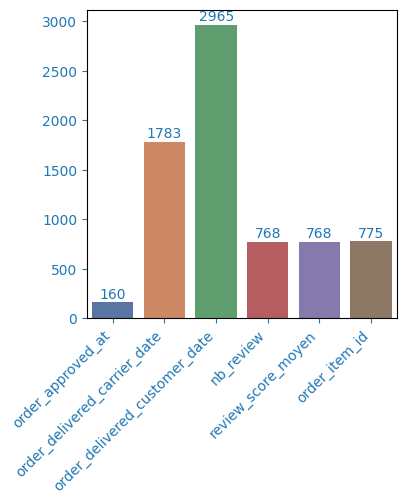

In [102]:
fig, ax = plt.subplots(1,1, figsize=(4,4))

g = sns.barplot(data = missing_value, palette = palette)
g.set_xticklabels(missing_value.columns,rotation = 45, ha ='right')

for container in ax.containers:
        ax.bar_label(container, padding=1, color = 'tab:blue')
plt.show()

In [103]:
otis_df.filter(pl.col('nb_review').is_null())

customer_id,customer_unique_id,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,paiement_total,nbre_versements,nb_review,review_score_moyen,order_item_id
str,str,str,str,datetime[μs],datetime[μs],datetime[μs],datetime[μs],datetime[μs],f64,f64,u32,f64,i64
"""9b8ce803689b35...","""7f3a72e8f988c6...","""17825f24877a92...","""delivered""",2017-05-11 00:00:00,2017-05-13 00:00:00,2017-05-15 00:00:00,2017-06-07 00:00:00,2017-05-30 00:00:00,102.03,1.0,null,null,1
"""265655cf1f2dfd...","""fc0a9229ea43fe...","""44918cef2a112f...","""shipped""",2018-02-06 00:00:00,2018-02-06 00:00:00,2018-02-07 00:00:00,null,2018-03-12 00:00:00,125.43,6.0,null,null,1
"""d6b41b191f1f64...","""3a62a4803c7745...","""1237d70df58d4f...","""delivered""",2017-10-09 00:00:00,2017-10-10 00:00:00,2017-11-17 00:00:00,2017-12-05 00:00:00,2017-11-06 00:00:00,75.66,1.0,null,null,1
"""befe184e4eb181...","""6ac6902b78ed85...","""e91a3bc14b8d12...","""delivered""",2018-08-27 00:00:00,2018-08-27 00:00:00,2018-08-28 00:00:00,2018-08-29 00:00:00,2018-08-31 00:00:00,53.48,1.0,null,null,1
"""3810ae52bde69b...","""0beec065ce2d16...","""0f503b220e9d1f...","""delivered""",2017-09-09 00:00:00,2017-09-09 00:00:00,2017-09-18 00:00:00,2017-10-06 00:00:00,2017-10-02 00:00:00,480.4,10.0,null,null,1
"""24867a30fb114e...","""2ca8ef8560c5cd...","""8d1177e3fcee9f...","""delivered""",2017-12-09 00:00:00,2017-12-09 00:00:00,2017-12-14 00:00:00,2018-01-04 00:00:00,2018-01-12 00:00:00,94.76,8.0,null,null,1
"""e4c8227df878d2...","""47bd939e378c0a...","""03a3628434dd67...","""delivered""",2017-07-20 00:00:00,2017-07-20 00:00:00,2017-07-21 00:00:00,2017-08-01 00:00:00,2017-08-11 00:00:00,393.84,8.0,null,null,2
"""5ffaa9e0952296...","""2f2c5d1fdc5db8...","""66b04218fe3a0a...","""delivered""",2018-02-03 00:00:00,2018-02-03 00:00:00,2018-02-16 00:00:00,2018-02-26 00:00:00,2018-03-20 00:00:00,46.24,2.0,null,null,1
"""5c78528de7bc16...","""e6925d3e39cebd...","""93881917b8e0f2...","""unavailable""",2018-08-11 00:00:00,2018-08-11 00:00:00,null,null,2018-08-21 00:00:00,674.7,6.0,null,null,null


In [104]:
otis_df['nb_review'].mean()

1.005584157613102

In [109]:
otis_df.select(pl.col('nb_review')).sum()

nb_review
u32
99223


### coverage

In [ ]:
debut = otis_df['order_purchase_timestamp'].min()
fin  = otis_df['order_purchase_timestamp'].max()

print(f"la base de donnée commence le {debut} et s'arrete le {fin}")
print(f"la base de donnée couvre une période de {fin-debut} jour")

# 2 - EXPLORATION

## 2.1.1 - Analyse univarié

### creation de colonnes : temps de livraison

In [110]:
#temps de livraison
otis_df=otis_df.with_columns([(pl.col('order_delivered_customer_date')-pl.col('order_purchase_timestamp'))\
                        .alias('temps_de_livraison'),
                          (pl.col('order_estimated_delivery_date')-pl.col('order_purchase_timestamp'))\
                        .alias('temps_de_livraison_estime'),    
                          (pl.col('order_approved_at')-pl.col('order_purchase_timestamp'))\
                        .alias('delta_order_approved_at'),
                          (pl.col('order_delivered_carrier_date')-pl.col('order_approved_at'))\
                        .alias('delta_delivered_carrier'),
                          (pl.col('order_delivered_customer_date')-pl.col('order_delivered_carrier_date'))\
                        .alias('delta_customer_date'),
                         ])

In [111]:
otis_df=otis_df.with_columns([
    
    (pl.col('temps_de_livraison_estime')-pl.col('temps_de_livraison'))\
                        .alias('delta_estimated_livraison'),
                            ])

In [112]:


graph_df = otis_df.groupby('temps_de_livraison_estime')\
.agg(pl.col("order_id").count().alias('count')).to_pandas()

In [113]:
occ_temps_livraison = pd.DataFrame({'temps_livraison' : otis_df['temps_de_livraison'].to_pandas()
                               }).value_counts().reset_index(name='occurence')

occ_temps_livraison_estime = pd.DataFrame({'temps_livraison_estime' : otis_df['temps_de_livraison_estime'].to_pandas()
                               }).value_counts().reset_index(name='occurence')


In [114]:
#Verification : on retrouve bien le nombre de ligne
occ_temps_livraison['occurence'].sum()

96475

In [115]:
#modification du typage ----> pour les graphiques

occ_temps_livraison['temps_livraison'] = occ_temps_livraison['temps_livraison'].astype('timedelta64[D]')
occ_temps_livraison['temps_livraison'] = occ_temps_livraison['temps_livraison'].astype('int')

occ_temps_livraison_estime['temps_livraison_estime'] = occ_temps_livraison_estime['temps_livraison_estime'].astype('timedelta64[D]')
occ_temps_livraison_estime['temps_livraison_estime'] = occ_temps_livraison_estime['temps_livraison_estime'].astype('int')

In [116]:
occ_temps_livraison.head(5)

,temps_livraison,occurence
0,7,7482
1,8,7123
2,6,6507
3,9,6256
4,10,5793


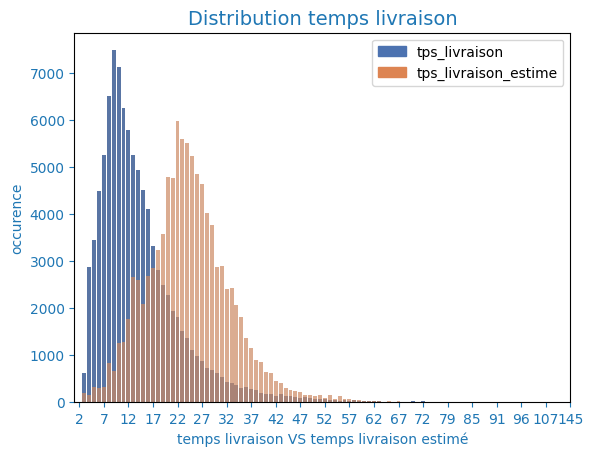

In [117]:

fig, ax = plt.subplots()

c1 = sns.color_palette('deep')[0]
tps_livraison = sns.barplot(occ_temps_livraison, x = 'temps_livraison', y = 'occurence',
                            color=c1 ,ax= ax,label = 'temps_livraison')


c2 = sns.color_palette('deep')[1]
tps_livraison_est = sns.barplot(occ_temps_livraison_estime, x = 'temps_livraison_estime',
                                y = 'occurence',color=c2 ,alpha = 0.7, ax= ax, )

# Création des patchs pour les légendes
patch1 = Patch(color=c1,label = 'tps_livraison')
patch2 = Patch(color=c2,label = 'tps_livraison_estime')
ax.legend(handles=[patch1, patch2], loc='upper right')

loc = plticker.MultipleLocator(base=5.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)


plt.title('Distribution temps livraison', color ='tab:blue', fontsize = 14)
plt.xlabel('temps livraison VS temps livraison estimé')
plt.xlim(-1, 100)



plt.show()

### creation de colonnes : Nombre de jour du dernier achat NJDA

In [118]:
#Nombre de jour depuis l'achat
date_tf = otis_df['order_purchase_timestamp'].max()
otis_df = otis_df.with_columns((date_tf-pl.col('order_purchase_timestamp'))\
                               .dt.days().alias("NJDA"))

In [119]:
njda = otis_df['NJDA'].value_counts().to_pandas()['NJDA'].values
counts = otis_df['NJDA'].value_counts().to_pandas()['counts'].values

In [120]:
graph_df = pd.DataFrame({'NJDA':njda,'counts': counts})
graph_df.head(5)

,NJDA,counts
0,272,64
1,228,1
2,620,155
3,180,143
4,512,197


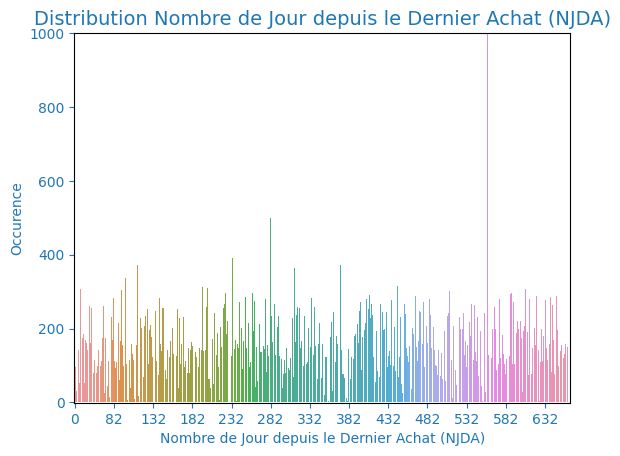

In [121]:
fig, ax = plt.subplots()
sns.barplot(graph_df, x='NJDA', y = 'counts', ax = ax)

loc = plticker.MultipleLocator(base=50.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)

plt.title('Distribution Nombre de Jour depuis le Dernier Achat (NJDA)', color ='tab:blue', fontsize = 14)
plt.ylabel('Occurence')
plt.xlabel('Nombre de Jour depuis le Dernier Achat (NJDA)')
plt.ylim(-1,1000)
plt.show()

In [122]:
#suppression des données temporelles autre que temps de livraisons et NJDA
liste_sup = [ 'order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date',
             'temps_de_livraison_estime','delta_order_approved_at','delta_delivered_carrier',
             'delta_customer_date','delta_estimated_livraison']

In [123]:
otis_df = otis_df.drop(liste_sup)

In [124]:
otis_df.columns

['customer_id',
 'customer_unique_id',
 'order_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'paiement_total',
 'nbre_versements',
 'nb_review',
 'review_score_moyen',
 'order_item_id',
 'temps_de_livraison',
 'NJDA']

In [125]:
otis_df.shape

(99440, 13)

## Différence entre customer_id et customer_unique_id

In [126]:
def col_unique_valeur(df = otis_df):
    liste_nbre_caracteres = []
    for col in otis_df.columns :
        unique_value = len(otis_df.select(pl.col(col).unique()))
        liste_nbre_caracteres.append(unique_value)
    return liste_nbre_caracteres

In [127]:
otis_unique_df = pd.DataFrame({'colonne_name' :otis_df.columns,
                               'unicite':col_unique_valeur()})
otis_unique_df.loc['total_ligne'] = len(otis_df)
otis_unique_df.sort_values(by = 'unicite', ascending = False).head(5)

,colonne_name,unicite
0,customer_id,99440
2,order_id,99440
total_ligne,99440,99440
1,customer_unique_id,96095
6,paiement_total,28002


In [128]:
#premiere filtre ou on selectionne que les order_item_id  = 1
order_item_1_df = otis_df.filter(pl.col('order_item_id')==1)

In [129]:
analyse_df = order_item_1_df.groupby('customer_unique_id')\
.agg(pl.col('customer_id').alias('customer_id'))

analyse_df = analyse_df.with_columns(
    pl.col('customer_id').apply(lambda x: len(x)).alias('controle')
)

In [130]:
analyse_df = analyse_df.filter(pl.col('controle')>=2)
#on recupere les customer_unique_id dans une liste
liste_analyse = analyse_df['customer_unique_id'].to_list()

In [131]:
#anlyse de ces observations:
#on selectionne les variables pour essayer de comprendre l'écart
colonne_analyse = ['customer_unique_id', 'customer_id','order_id','order_item_id',
                 'paiement_total','order_purchase_timestamp']

analyse_df = order_item_1_df.filter(pl.col('customer_unique_id').is_in(liste_analyse))
analyse_df[colonne_analyse].filter(pl.col('customer_unique_id')=='f121995493925a5ef0b46a13f594e0ab')

customer_unique_id,customer_id,order_id,order_item_id,paiement_total,order_purchase_timestamp
str,str,str,i64,f64,datetime[μs]
"""f121995493925a...","""bf16ebb1ed47bc...","""b552f6623b3b47...",1,435.95,2018-01-16 00:00:00
"""f121995493925a...","""080be8dccd7f4d...","""840609035f6daa...",1,41.69,2017-08-14 00:00:00


On voit ici que le customer_id correspond plus a un order_id qu'un referencement de client.
On utilisera la colonne customer_unique_id comme référence client.

## creation de colonnes : Nombre achat & quantité acheté

In [132]:
liste_order_item_id_plus = otis_df.select(
    [pl.col('order_id'),
     pl.col('order_item_id'),
    ])\
.filter(pl.col('order_item_id')>=2)\
.select(pl.col('order_id'))['order_id'].to_list()

otis_df.filter(
    pl.col('order_id')\
    .is_in(liste_order_item_id_plus[0:2]))[['order_id','order_item_id','paiement_total']]

order_id,order_item_id,paiement_total
str,i64,f64
"""aaff8afa47c842...",3,232.71
"""77b062be7c5bd2...",2,134.25


On voit bien ici que le order_item_id correspond a la quantité acheté mais pas le nombre d'achat
on devra donc creer deux colonnes : la quantité acheté et le nombre de commande.

## Le nombre d'achat

In [133]:
#pour le nombre d'achat nous ne prenons pas en compte la quantité acheté
nombre_achat_customer_df = order_item_1_df.groupby(by = 'customer_unique_id')\
.agg([
    pl.col('order_id').count().alias('nb_commande'),
    pl.col('order_item_id').max().alias('quantite_achat')
     ])
nombre_achat_customer_df.head(5)

customer_unique_id,nb_commande,quantite_achat
str,u32,i64
"""4350cf84c81dc8...",1,1
"""7968b545ea270a...",1,1
"""14ba18bb17a304...",1,1
"""cd54ac48febc79...",1,1
"""9fe43a80032120...",1,1


In [134]:
#on effectue une jointure pour récuperer la colonne "nombre achat"
otis_df = otis_df.join(nombre_achat_customer_df, on = 'customer_unique_id' , how = 'inner')

In [135]:
df_graph = otis_df.groupby(by = 'nb_commande').agg(pl.col('customer_unique_id').count().alias('nombre_customers'))

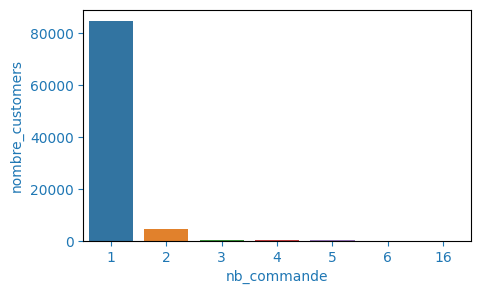

In [136]:
fig, ax = plt.subplots(1,1, figsize = (5,3))
sns.barplot(df_graph.to_pandas(),  x = 'nb_commande', y = 'nombre_customers')

plt.show()

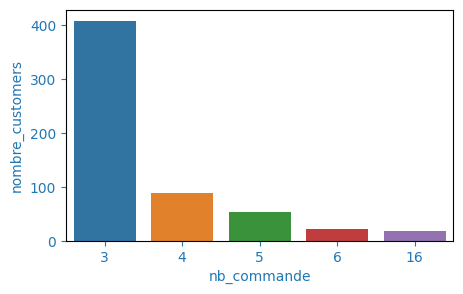

In [137]:
fig, ax = plt.subplots(1,1, figsize = (5,3))
data = df_graph.filter(pl.col('nb_commande')>2).to_pandas()
sns.barplot(data,  x = 'nb_commande', y = 'nombre_customers')

plt.show()

## review score

In [138]:
graph_df = pd.DataFrame({'score': otis_df.to_pandas()['review_score_moyen'].unique(),
                         'quantité' :otis_df.to_pandas()['review_score_moyen'].value_counts()})
graph_df = graph_df.reset_index(drop = True)
graph_df

ValueError: array length 12 does not match index length 11

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(4,3))
sns.barplot(graph_df, x = 'score', y ='quantité')
for container in ax.containers:
        ax.bar_label(container, padding=-2, color = 'tab:blue')
plt.show()

## Paiement

### Distribution

In [139]:
data = otis_df['paiement_total']

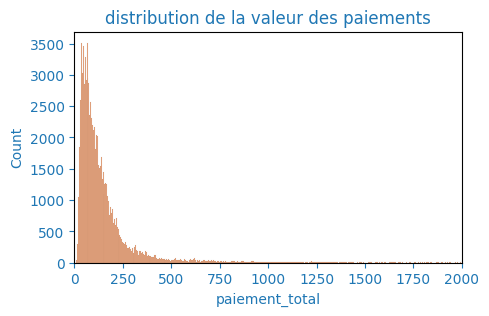

In [140]:
fig, ax = plt.subplots(1,1, figsize= (5,3))
sns.histplot(data.to_pandas(), color = sns.color_palette('deep')[1])
plt.xlim(0,2000)
plt.title('distribution de la valeur des paiements', color = "tab:blue")
plt.show()

In [141]:
statistic = ['min', 'mean','max','std' ]
data.describe().filter(pl.col('statistic').is_in(statistic))

statistic,value
str,f64
"""min""",0.0
"""max""",6929.31
"""mean""",151.288329
"""std""",205.561022


## Constructionde la base clients

In [144]:
otis_df.columns

['customer_id',
 'customer_unique_id',
 'order_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'paiement_total',
 'nbre_versements',
 'nb_review',
 'review_score_moyen',
 'order_item_id',
 'temps_de_livraison',
 'NJDA',
 'nb_commande',
 'quantite_achat']

In [145]:
otis_customers_df = otis_df.groupby(by ='customer_unique_id')\
.agg([pl.col('nb_commande').max().alias('nbre_achat'),
      pl.col('quantite_achat').max().alias('quantite_achat_max'),
      pl.col('paiement_total').mean().alias('paiement_moyen'),          #payement moyen
      pl.col('temps_de_livraison').mean().alias('temps_livraison_moyen'), #temps de livraison moyen
      pl.col('review_score_moyen').mean().alias('review_score_moyen'),        #'review_score_moyen'
      pl.col('NJDA').min().alias('NJDA'),
       ])

In [146]:
otis_customers_df = otis_customers_df.to_pandas()
otis_customers_df.head(5)

,customer_unique_id,nbre_achat,quantite_achat_max,paiement_moyen,temps_livraison_moyen,review_score_moyen,NJDA
0,8ac6335b52338b08e4f607ad01c0ca75,1,1,54.09,13 days,5.0,252
1,60a31fb224a2ade6a4a2508fb0305991,1,1,678.17,18 days,3.0,579
2,0825f342da6a33d48c89202d11ef61f7,1,1,138.64,6 days,5.0,88
3,49775316f12383c6fd30504f0922b7aa,1,1,49.09,22 days,1.0,323
4,71289f58e61bb9977ff1c6f7d91a5af7,1,1,35.24,8 days,5.0,90


In [147]:
#on modifie le type de la colonne temps livraison moyen
otis_customers_df['temps_livraison_moyen'] = otis_customers_df['temps_livraison_moyen'].view(int)

In [148]:
otis_customers_df.dtypes

customer_unique_id        object
nbre_achat                uint32
quantite_achat_max         int64
paiement_moyen           float64
temps_livraison_moyen      int64
review_score_moyen       float64
NJDA                       int64
dtype: object

In [149]:
#fichier customers plus(features)
otis_customers_df.to_csv('data/cleaned/customers.csv')